<a href="https://colab.research.google.com/github/GalinaZh/Appl_alg2021/blob/main/Applied_Alg_sem_7_Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 7 
# Прикладная алгебра и численные методы
## Многочлены Чебышева

In [1]:
!python -m pip install sympy --upgrade

     |████████████████████████████████| 5.9MB 2.2MB/s 
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


In [55]:
!python -m pip install numpy --upgrade

Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.19.5)


In [1]:
import numpy as np
import sympy
from sympy import S
from sympy.functions.special.polynomials import chebyshevt, chebyshevu
from numpy.polynomial.chebyshev import chebinterpolate
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
%matplotlib inline

In [2]:
import sympy
import numpy
sympy.__version__, numpy.__version__

('1.7.1', '1.19.5')

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.norm.html#scipy.linalg.norm

https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html


## Многочлен Чебышева первого рода
$T_0(x) = 1$, $T_1(x) = x$, $T_(x) = 2xT_{n - 1}(x) - T_{n - 2}(x)$, $n\ge 2$.
## Пример 1
Построим графики многочленов Чебышева первого рода при $n = 4, 5$.

8*x**4 - 8*x**2 + 1

16*x**5 - 20*x**3 + 5*x

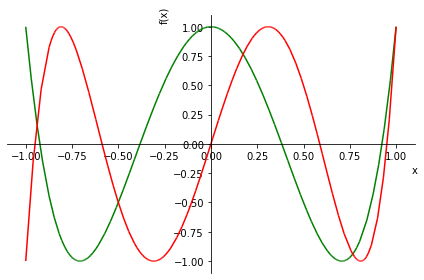

In [3]:
x = S('x')
def T(n, x):
  if n == 0:
    return 1
  if n == 1:
    return x
  return sympy.expand(sympy.simplify(2*x*T(n - 1, x) - T(n - 2, x)))

display(T(4, x), T(5, x))
p = sympy.plot(T(4, x), (x, -1, 1), line_color='green', show=False)
p.extend(sympy.plot(T(5, x), (x, -1, 1), line_color='red', show=False))
p.show()

## Пример 2.
$$
T_n(x) = \frac{(x + \sqrt{x^2 - 1})^n + (x - \sqrt{x^2 - 1})^n}{2}, \quad |x| \ge 1.
$$
Построим многочлен Чебышева первого рода порядка 15 по приведенной выше формуле и по рекурсивной формуле Примера 1.

На сетке значений $x$ от 2 до 3 с шагом 0.001 вычислить нормы разностей значений многочлена Чебышева, полученных двумя способами.

0.020938336849212646 0.0013388702364580465 0.0006147238041184818


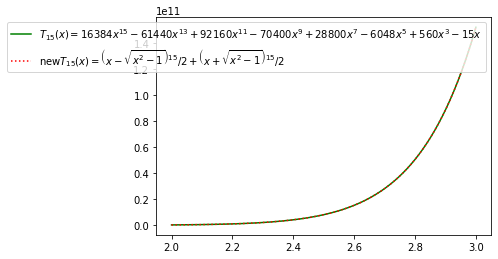

In [4]:
def T_new(n, x):
  return ((x + sympy.sqrt(x**2 - 1))**n + (x - sympy.sqrt(x**2 - 1))**n)/2

X = np.linspace(2, 3, 1001)
Y1 = sympy.lambdify(x, T(15, x))(X)
Y2 = sympy.lambdify(x, T_new(15, x))(X)

print(*[np.linalg.norm(Y1 - Y2, k) for k in [1, 2, 3]])
plt.plot(X, Y1, 'g-', label=sympy.latex(sympy.Eq(S('T15(x)'), T(15, x)), mode='inline'))
plt.plot(X, Y2, 'r:', label=sympy.latex(sympy.Eq(S('newT15(x)'), T_new(15, x)), mode='inline'))
plt.legend()

## Пример 3
Многочлен Чебышева второго рода:
$$
U_n = \frac{1}{n + 1}T'_{n + 1}(x), \quad n \ge 0.
$$
$$
U_n(x) = \frac{(x + \sqrt{x^2 - 1})^{n + 1} - (x - \sqrt{x^2 - 1})^{n + 1}}{2\sqrt{x^2 - 1}}, \quad |x| \ge 1.
$$

Построим многочлен Чебышева степени 7 двумя способами, сравним нормы разностей на сетке как в Примере 2.

In [5]:
def U(n, x):
    return sympy.expand(sympy.simplify(T(n + 1, x).diff(x)/(n + 1)))
def U_new(n, x):
    return sympy.expand(sympy.simplify(sympy.expand(((x + sympy.sqrt(x**2 - 1))**(n + 1) - (x - sympy.sqrt(x**2 - 1))**(n + 1)))/(2*sympy.sqrt(x**2 - 1))))
def U1(n, x):
    return sympy.expand(sympy.simplify(T_new(n + 1, x).diff(x)/(n + 1)))
display(U(7, x), U_new(7, x), U1(7, x))    


128*x**7 - 192*x**5 + 80*x**3 - 8*x

128*x**7 - 192*x**5 + 80*x**3 - 8*x

128*x**7 - 192*x**5 + 80*x**3 - 8*x

## Многочлен Чебышева в Sympy.
В sympy.functions.special.polynomials есть chebyshevt и chebyshevu,
возвращающие соответственно многочлен Чебышева первого и второго рода, аргументы - порядок многочлена и переменная.

## Пример 4.
Построим полиномы Чебышева первого и второго рода порядка 5:

In [6]:
display(chebyshevt(5, x), chebyshevu(5, x))  

16*x**5 - 20*x**3 + 5*x

32*x**5 - 32*x**3 + 6*x

## Пример 5
Норма Чебышева (максимум модуля на данном отрезке):
$$
|f|_0 = \max_{[-1, 1]}|f(x)|.
$$
Площадь под графиком функции на данном отрезке:
$$
|f|_1 = \int_{-1}^1|f(x)|\,dx.
$$
Вычислить норму Чебышева и площадь под графиком для $f(x) = \frac{x^3}{e^x}$ на отрезке [-1, 1].

In [7]:
x = S('x')

def f5(x):
  return x**3/sympy.exp(x)

f5_norm0 = sympy.calculus.util.maximum(f5(x), x, domain=sympy.Interval(-1, 1))
f5_norm1 = sympy.Abs(f5(x)).integrate((x, -1, 1))
display('|f4|0 = {0} = {1}'.format(f5_norm0, round(f5_norm0, 3)),
        '|f4|1 = {0} = {1}'.format(f5_norm1, round(f5_norm1, 3)))  

'|f4|0 = exp(-1) = 0.368'

'|f4|1 = -16*exp(-1) - 2*E + 12 = 0.677'

## Пример 6
Наилучшее приближение функции $f(x)$ многочленом степени $\le n$:
$$
\tilde{f}(x) = \sum_{i=0}^n \frac{<T_i, f>}{<T_i, T_i>}T_i(x),
$$
$T_i(x)$ многочлен Чебышева первого рода степени $i$,
$$
<f, g> = \int_{-1}^1 \frac{f(x)g(x)}{\sqrt{1 - x^2}}\,dx, \quad 
|f| = \sqrt{<f, f>} = \sqrt{\int_{-1}^1 \frac{f^2(x)}{\sqrt{1 - x^2}}\,dx}
$$

Построим многочлен степени не выше 3, наилучшим образом приближающий $x^5 - 1$ на [-1, 1]

-1
5/8
0
5/16


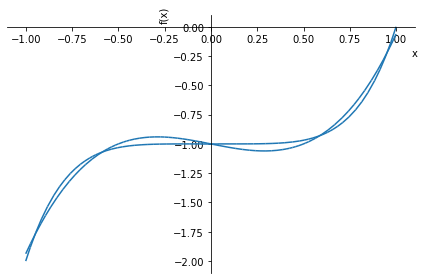

5*x**3/4 - 5*x/16 - 1

In [8]:
x = S('x')
def f6(x):
    return x**5 - 1

def dot_prod_cheb(f, g, x):
    return (f*g/sympy.sqrt(1 - x**2)).integrate((x, -1, 1))

def f_cheb(f, n, x):
    res = 0
    for k in range(n + 1):
        cheb_k = chebyshevt(k, x)
        coef = dot_prod_cheb(cheb_k, f, x)/dot_prod_cheb(cheb_k, cheb_k, x)
        print(coef)
        res += coef*cheb_k
    return res   
res6 = f_cheb(f6(x), 3, x)   
sympy.plot((res6, (x, -1, 1)), (f6(x), (x, -1, 1)))  
display(res6)

## Наилучшее приближение функции $f(x)$ многочленом Чебышева, Numpy.

https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.Chebyshev.html

Для построения многочлена Чебышева используем chebinterpolate из 
numpy.polynomial.chebyshev 

Первый (обязательный) аргумент  chebinterpolate - имя функции, второй - порядок многочлена.

Возвращает chebinterpolate коэффициенты $a_i$ при многочленах Чебышева, в порядке возрастания степени:
$$
f(x) = a_0T_0 + a_1T_1 + ... + a_nT_n.
$$
## Пример 7
Построим многочлен Чебышева для Примера 6 с помощью chebinterpolate.



In [9]:
res7 = chebinterpolate(f6, 3)
res7

array([-1.00000000e+00,  6.25000000e-01,  8.32667268e-17,  2.50000000e-01])

Представим функцию $f_6$ с помощью полиномов Чебышева:

In [10]:
res7poly = res7[0]
for k in range(1, len(res7)):
    res7poly += res7[k]*chebyshevt(k, x)
display(res7poly)    

1.0*x**3 + 1.66533453693773e-16*x**2 - 0.125*x - 1.0

Изобразим на одном графике функцию $f_6$ и ее представление полиномами Чебышева, полученными с помощью Sympy и Numpy:

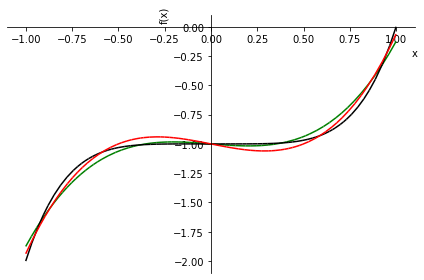

In [12]:
p = sympy.plot(res7poly, (x, -1, 1), line_color='green', show=False)
p.extend(sympy.plot(f6(x), (x, -1, 1), line_color='black', show=False))
p.extend(sympy.plot(res6, (x, -1, 1), line_color='red', show=False))
p.show()

Представления $f_6$, полученные с помощью Sympy и Numpy несколько различаются. 

Сравним нормы разностей функции $f_6$ и ее разложений:

In [13]:
for item in (res7poly, res6):
    f7_norm0 = sympy.calculus.util.maximum(f6(x) - item, x, domain=sympy.Interval(-1, 1))
    f7_norm1 = sympy.Abs(f6(x) - item).integrate((x, -1, 1))
    display('|f7|0 = {0}'.format(round(f7_norm0, 3)),
        '|f7|1 = {0}'.format(round(f7_norm1, 3)))  


'|f7|0 = 0.125'

'|f7|1 = 0.076'

'|f7|0 = 0.062'

'|f7|1 = 0.079'

Как видно, у разложения Numpy меньше максимум модуля отклонения от функции на отрезке [-1, 1], а у разложения Sympy - площадь между графиками функции и ее разложения. 

Посмотрим, как Numpy и Sympy раскладывают по полиномам Чебышева $x^5 - 1$ в полином степени не больше 5 (должно получиться ровно $x^5 - 1$).

In [14]:
res10= chebinterpolate(lambda x: x**5 - 1, 5)
res10poly = res10[0]
for k in range(1, len(res10)):
    res10poly += res10[k]*chebyshevt(k, x)
res10poly     

0.999999999999991*x**5 + 7.99360577730113e-15*x**4 + 9.32587340685131e-15*x**3 - 7.38298311375729e-15*x**2 - 1.27675647831893e-15*x - 0.999999999999999

-1
5/8
0
5/16
0
1/16


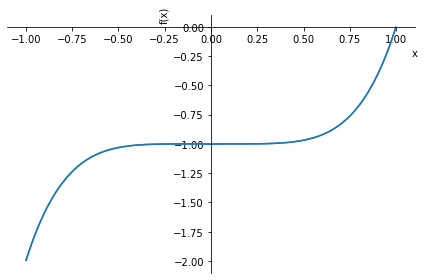

x**5 - 1

In [15]:
x = S('x')
def f0(x):
    return x**5 - 1
  
res = f_cheb(f0(x), 5, x)   
sympy.plot((res, (x, -1, 1)), (f0(x), (x, -1, 1)))  
display(res)